# Taxi Visualizations and Tables

To run simply click above on the tab that says "Cell" and choose the option to "Run All Below"  

In [87]:
%matplotlib inline
import pandas as pd
from geopy.geocoders import Nominatim
import numpy as np
from threading import Thread
import random
import matplotlib.pyplot as plt
import seaborn as sns





## Generating Data Set

The code below deals with the reading of data sets from the different months of the year and randomly sampling them to generate our final data set. It has be commented out because the clean data set has already been generated.

In [88]:
# def build_data(size):
# #     '''Generate one dataframe of taxi trip data over the entire year, 
# #     taking a sample of specified size from each month'''

# #     # iterate over the 12 months
#     for i in range(1,6):
        
#         # read in the two data sets
#         taxi_data = pd.read_csv(str(i) + '-15.csv').reset_index()
        
#         # generate a random sample (without replacement)
#         sample = random.sample(range(0,len(taxi_data) + 1),size)
        
#         # take a sample of the each data set
#         taxi_sub = taxi_data[taxi_data.index.isin(sample)]
        
#         # delete the larger files from memory
#         del taxi_data

#         # eliminate outliers based on location
#         taxi_sub = taxi_sub[(taxi_sub.pickup_latitude > 40.6) & (taxi_sub.pickup_latitude < 40.9) & (taxi_sub.pickup_longitude < -73.7) & (taxi_sub.pickup_longitude > -74.1)]
#         taxi_sub = taxi_sub[(taxi_sub.dropoff_latitude > 40.6) & (taxi_sub.dropoff_latitude < 40.9) & (taxi_sub.dropoff_longitude < -73.7) & (taxi_sub.dropoff_longitude > -74.1)]
      
#         # concatenate with previous months
#         if i == 1:
#             df = taxi_sub
#         else:
#             df = pd.concat([df,taxi_sub],ignore_index = True)
    
#     # return the finished dataframe
#     return df    

# # generate and save the dataframe
# taxi = build_data(10000)
# taxi.to_csv('taxi_master.csv')

# taxi.head()


### Dynamic Neighboorhood assignment

The code below dynamically assigns neighborhoods but unfortunately was unable to assign the 36000 points without timing out. It was only used for a few samples

In [89]:

# # Generate neighborhoods dynamically (API times out too quickly)
# geolocator = Nominatim()

# from time import sleep
# df = taxi

# # def neighborhood_helper(lat, lng):
# #     thread = Thread(target = neighborhood, args = (lat,lng, ))
# #     thread.start()
    
    
# def neighborhood(latitude,longitude):
#     location = geolocator.reverse((latitude,longitude))
#     raw = location.raw
#     if 'neighbourhood' in raw['address']:
#       return raw['address']['neighbourhood']
#     else:
#       return 'Nope'


# def dropoff_assignment():
#     df['dropoff_hood'] = df.apply(lambda x: neighborhood(x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

# def pickup_assignment():
#     df['pickup_hood'] = df.apply(lambda x: neighborhood(x['pickup_latitude'], x['pickup_longitude']), axis=1)


# dropoffs = []
# pickups =  []
# for index, row in df.iterrows():
#     sleep(1)
#     dropoffs.append(neighborhood(row['dropoff_latitude'], row['dropoff_longitude']))
#     sleep(1)
#     pickups.append(neighborhood(row['pickup_latitude'], row['pickup_longitude']))


# df['Pickup_Hood'] = pickups

# df['Dropoff_Hood'] = dropoffs

# df.to_csv('taxi_master_with_loc.csv')

In [90]:
# # Make a tuple column for pickup and dropoff latitudes and longitudes
# taxi['pickup_lat_long'] = zip(taxi.pickup_latitude, taxi.pickup_longitude)
# taxi['dropoff_lat_long'] = zip(taxi.dropoff_latitude, taxi.dropoff_longitude)

# # Define the pickup neighborhood column
# taxi['pickup_neighborhood'] = ['Upper East Side' if ((-73.93269 <= longitude <= -73.958506 and (-.400732*longitude + 11.120735 <= latitude <= 1.351248*longitude + 140.720423))
#                                or (-73.958506 < longitude <= -73.955760 and (1.351248*longitude + 140.690003 <= latitude <= 1.351248*longitude + 140.720423)) 
#                                or (-73.955760 < longitude <= -73.938250 and (1.351248*longitude + 140.690003 <= latitude <= -0.400732*longitude + 11.151410)))
#                                else 'Upper West Side' if ((-73.996349 <= longitude <= -73.981929 and (-.437663*longitude + 8.388736 <= latitude <= 1.411006*longitude + 145.183292))
#                                or (-73.981929 < longitude <= -73.971286 and (1.411006*longitude + 145.156835 <= latitude <= 1.411006*longitude + 145.183292)) 
#                                or (-73.971286 < longitude <= -73.958669 and (1.411006*longitude + 145.156835 <= latitude <= -0.437663*longitude + 8.431736)))
#                                else 'East Harlem' if ((-73.955810 <= longitude <= -73.941562 and (-.410514*longitude + 10.427000 <= latitude <= 1.364892*longitude + 141.729588))
#                                or (-73.941562 < longitude <= -73.934009 and (1.364892*longitude + 141.701598 <= latitude <= 1.364892*longitude + 141.729588)) 
#                                or (-73.934009 < longitude <= -73.927400 and (1.364892*longitude + 141.701598 <= latitude <= -2.870328*longitude - 171.397205)))
#                                else 'Harlem' if ((-73.970920 <= longitude <= -73.949376 and (-.434274*longitude + 8.682696 <= latitude <= 1.335965*longitude + 139.629557))
#                                or (-73.949376 < longitude <= -73.950406 and (1.335965*longitude + 139.590765 <= latitude <= 1.335965*longitude + 139.629557)) 
#                                or (-73.950406 < longitude <= -73.933669 and (1.335965*longitude + 139.590765 <= latitude <= -.434274*longitude + 8.719664)))
#                                else 'Washington Heights' if ((-73.952561 <= longitude <= -73.934450 and (-.405223*longitude + 10.868172 <= latitude <= 1.704239*longitude + 166.868290))
#                                or (-73.934450 < longitude <= -73.938313 and (2.030519*longitude + 190.953417 <= latitude <= 1.704239*longitude + 166.868290)) 
#                                or (-73.938313 < longitude <= -73.921147 and (2.030519*longitude + 190.953417 <= latitude <= -.405223*longitude + 10.898228)))
#                                else 'Chelsea' if ((-74.012918 <= longitude <= -74.004936 and (-.425864*longitude + 9.225036 <= latitude <= 1.46181*longitude + 148.938269))
#                                or (-74.004936 < longitude <= -73.996181 and (-.425864*longitude + 9.225036 <= latitude <= -.425864*longitude + 9.241076)) 
#                                or (-73.996181 < longitude <= -73.987684 and (1.46181*longitude + 148.905703 <= latitude <= -.425864*longitude + 9.241076)))
#                                else "Hell's Kitchen" if ((-74.005267 <= longitude <= -73.994023 and (-.455589*longitude + 7.041340 <= latitude <= 1.380893*longitude + 142.951146))
#                                or (-73.994023 < longitude <= -73.993423 and (-.455589*longitude + 7.041340 <= latitude <= -.455589*longitude + 7.062455)) 
#                                or (-73.993423 < longitude <= -73.982265 and (1.380893*longitude + 142.928930 <= latitude <= -.455589*longitude + 7.062455)))
#                                else 'Midtown' if ((-73.993851 <= longitude <= -73.984495 and (-.401974*longitude + 11.008620 <= latitude <= 1.389750*longitude + 143.583485))
#                                or (-73.984495 < longitude <= -73.981491 and (1.389750*longitude + 143.568415 <= latitude <= 1.389750*longitude + 143.583485)) 
#                                or (-73.981491 < longitude <= -73.973080 and (1.389750*longitude + 143.568415 <= latitude <= -.401974*longitude + 11.029072)))
#                                else 'Midtown East' if ((-73.984495 <= longitude <= -73.972908 and (-.425289*longitude + 9.268809 <= latitude <= 1.369121*longitude + 142.042124))
#                                or (-73.972908 < longitude <= -73.966986 and (-.425289*longitude + 9.268809 <= latitude <= -.425289*longitude + 9.289603)) 
#                                or (-73.966986 < longitude <= -73.959004 and (1.369121*longitude + 142.017172 <= latitude <= -.425289*longitude + 9.289603)))
#                                else 'Murray Hill and Gramercy' if ((-73.996782 <= longitude <= -73.987684 and (-.398282*longitude + 11.265240 <= latitude <= 1.422401*longitude + 145.989923))
#                                or (-73.987684 < longitude <= -73.971634 and (-.398282*longitude + 11.265240 <= latitude <= -.398282*longitude + 11.281685)) 
#                                or (-73.971634 < longitude <= -73.963909 and (1.422401*longitude + 145.944136 <= latitude <= -.398282*longitude + 11.281685)))
#                                else 'East Village' if ((-73.992711 <= longitude <= -73.989621 and (-.430977*longitude + 8.834987 <= latitude <= 3.283819*longitude + 283.702814))
#                                or (-73.989621 < longitude <= -73.972626 and (-.430977*longitude + 8.834987 <= latitude <= -.430977*longitude + 8.846466)) 
#                                or (-73.972626 < longitude <= -73.971511 and (3.283819*longitude + 283.635539 <= latitude <= -.430977*longitude + 8.846466)))
#                                else 'West Village' if ((-74.014761 <= longitude <= -74.009354 and (-.391182*longitude + 11.778190 <= latitude <= 1.374746*longitude + 142.486385))
#                                or (-74.009354 < longitude <= -74.003603 and (-.391182*longitude + 11.778190 <= latitude <= -.391182*longitude + 11.791224)) 
#                                or (-74.003603 < longitude <= -73.996222 and (1.374746*longitude + 142.463195 <= latitude <= -.391182*longitude + 11.791224)))
#                                else 'Greenwich Village' if ((-74.002925 <= longitude <= -73.996230 and (-.454489*longitude + 7.094597 <= latitude <= 1.359970*longitude + 141.369870))
#                                or (-73.996230 < longitude <= -73.992711 and (-.454489*longitude + 7.094597 <= latitude <= -.454489*longitude + 7.106744)) 
#                                or (-73.992711 < longitude <= -73.989792 and (3.498458*longitude + 299.584471 <= latitude <= -.454489*longitude + 7.106744)))
#                                else 'Financial District' if ((-74.017118 <= longitude <= -74.012741 and (-.689918*longitude - 10.363466 <= latitude <= 3.348184*longitude + 288.525206))
#                                or (-74.012741 < longitude <= -74.010166 and (-.689918*longitude - 10.363466 <= latitude <= -.689918*longitude - 10.345791)) 
#                                or (-74.010166 < longitude <= -73.999351 and (3.348184*longitude + 288.471136 <= latitude <= -.689918*longitude - 10.345791)))
#                                else 'Lower East Side' if ((-74.001139 <= longitude <= -73.992642 and (-.296245*longitude + 18.787784 <= latitude <= 2.520648*longitude + 227.241074))
#                                or (-73.992642 < longitude <= -73.978223 and (-.296245*longitude + 18.787784 <= latitude <= -.296245*longitude + 18.804157)) 
#                                or (-73.978223 < longitude <= -73.973759 and (2.520648*longitude + 227.180321 <= latitude <= -.296245*longitude + 18.804157)))
#                                else 'Soho' if ((-74.017018 <= longitude <= -74.011096 and (-.313095*longitude + 17.540902 <= latitude <= 1.631911*longitude + 161.509288))
#                                or (-74.011096 < longitude <= -74.001225 and (-.313095*longitude + 17.540902 <= latitude <= -.313095*longitude + 17.557262)) 
#                                or (-74.001225 < longitude <= -73.992814 and (1.631911*longitude + 161.473729 <= latitude <= -.313095*longitude + 17.557262)))
#                                else 'Central Park' if ((-73.981834 <= longitude <= -73.972994 and (-.423978*longitude + 9.401321 <= latitude <= 1.364612*longitude + 141.724251))
#                                or (-73.972994 < longitude <= -73.957716 and (1.364612*longitude + 141.708678 <= latitude <= 1.364612*longitude + 141.724251)) 
#                                or (-73.957716 < longitude <= -73.949133 and (1.364612*longitude + 141.708678 <= latitude <= -.423978*longitude + 9.443998)))
#                                else 'New Jersey' if (latitude >= 1.691689*longitude + 165.960150)
#                                else 'Brooklyn' if (-74.042158 <= longitude <= -73.858137 and latitude < 40.700187)
#                                else 'Laguardia Airport' if (-73.889398 <= longitude <= -73.855924 and 40.761247 <= latitude <= 40.785557)
#                                else 'JFK Airport' if (-73.833340 <= longitude <= -73.747166 and 40.629567 <= latitude <= 40.670202)
#                                else 'Queens' if (-73.940543 <= longitude <= -73.724937 and 40.672374 <= latitude <= 40.766049)
#                                else 'Other' for latitude, longitude in taxi['pickup_lat_long']]

# # Define the dropoff neighborhood column
# taxi['dropoff_neighborhood'] = ['Upper East Side' if ((-73.93269 <= longitude <= -73.958506 and (-.400732*longitude + 11.120735 <= latitude <= 1.351248*longitude + 140.720423))
#                                or (-73.958506 < longitude <= -73.955760 and (1.351248*longitude + 140.690003 <= latitude <= 1.351248*longitude + 140.720423)) 
#                                or (-73.955760 < longitude <= -73.938250 and (1.351248*longitude + 140.690003 <= latitude <= -0.400732*longitude + 11.151410)))
#                                else 'Upper West Side' if ((-73.996349 <= longitude <= -73.981929 and (-.437663*longitude + 8.388736 <= latitude <= 1.411006*longitude + 145.183292))
#                                or (-73.981929 < longitude <= -73.971286 and (1.411006*longitude + 145.156835 <= latitude <= 1.411006*longitude + 145.183292)) 
#                                or (-73.971286 < longitude <= -73.958669 and (1.411006*longitude + 145.156835 <= latitude <= -0.437663*longitude + 8.431736)))
#                                else 'East Harlem' if ((-73.955810 <= longitude <= -73.941562 and (-.410514*longitude + 10.427000 <= latitude <= 1.364892*longitude + 141.729588))
#                                or (-73.941562 < longitude <= -73.934009 and (1.364892*longitude + 141.701598 <= latitude <= 1.364892*longitude + 141.729588)) 
#                                or (-73.934009 < longitude <= -73.927400 and (1.364892*longitude + 141.701598 <= latitude <= -2.870328*longitude - 171.397205)))
#                                else 'Harlem' if ((-73.970920 <= longitude <= -73.949376 and (-.434274*longitude + 8.682696 <= latitude <= 1.335965*longitude + 139.629557))
#                                or (-73.949376 < longitude <= -73.950406 and (1.335965*longitude + 139.590765 <= latitude <= 1.335965*longitude + 139.629557)) 
#                                or (-73.950406 < longitude <= -73.933669 and (1.335965*longitude + 139.590765 <= latitude <= -.434274*longitude + 8.719664)))
#                                else 'Washington Heights' if ((-73.952561 <= longitude <= -73.934450 and (-.405223*longitude + 10.868172 <= latitude <= 1.704239*longitude + 166.868290))
#                                or (-73.934450 < longitude <= -73.938313 and (2.030519*longitude + 190.953417 <= latitude <= 1.704239*longitude + 166.868290)) 
#                                or (-73.938313 < longitude <= -73.921147 and (2.030519*longitude + 190.953417 <= latitude <= -.405223*longitude + 10.898228)))
#                                else 'Chelsea' if ((-74.012918 <= longitude <= -74.004936 and (-.425864*longitude + 9.225036 <= latitude <= 1.46181*longitude + 148.938269))
#                                or (-74.004936 < longitude <= -73.996181 and (-.425864*longitude + 9.225036 <= latitude <= -.425864*longitude + 9.241076)) 
#                                or (-73.996181 < longitude <= -73.987684 and (1.46181*longitude + 148.905703 <= latitude <= -.425864*longitude + 9.241076)))
#                                else "Hell's Kitchen" if ((-74.005267 <= longitude <= -73.994023 and (-.455589*longitude + 7.041340 <= latitude <= 1.380893*longitude + 142.951146))
#                                or (-73.994023 < longitude <= -73.993423 and (-.455589*longitude + 7.041340 <= latitude <= -.455589*longitude + 7.062455)) 
#                                or (-73.993423 < longitude <= -73.982265 and (1.380893*longitude + 142.928930 <= latitude <= -.455589*longitude + 7.062455)))
#                                else 'Midtown' if ((-73.993851 <= longitude <= -73.984495 and (-.401974*longitude + 11.008620 <= latitude <= 1.389750*longitude + 143.583485))
#                                or (-73.984495 < longitude <= -73.981491 and (1.389750*longitude + 143.568415 <= latitude <= 1.389750*longitude + 143.583485)) 
#                                or (-73.981491 < longitude <= -73.973080 and (1.389750*longitude + 143.568415 <= latitude <= -.401974*longitude + 11.029072)))
#                                else 'Midtown East' if ((-73.984495 <= longitude <= -73.972908 and (-.425289*longitude + 9.268809 <= latitude <= 1.369121*longitude + 142.042124))
#                                or (-73.972908 < longitude <= -73.966986 and (-.425289*longitude + 9.268809 <= latitude <= -.425289*longitude + 9.289603)) 
#                                or (-73.966986 < longitude <= -73.959004 and (1.369121*longitude + 142.017172 <= latitude <= -.425289*longitude + 9.289603)))
#                                else 'Murray Hill and Gramercy' if ((-73.996782 <= longitude <= -73.987684 and (-.398282*longitude + 11.265240 <= latitude <= 1.422401*longitude + 145.989923))
#                                or (-73.987684 < longitude <= -73.971634 and (-.398282*longitude + 11.265240 <= latitude <= -.398282*longitude + 11.281685)) 
#                                or (-73.971634 < longitude <= -73.963909 and (1.422401*longitude + 145.944136 <= latitude <= -.398282*longitude + 11.281685)))
#                                else 'East Village' if ((-73.992711 <= longitude <= -73.989621 and (-.430977*longitude + 8.834987 <= latitude <= 3.283819*longitude + 283.702814))
#                                or (-73.989621 < longitude <= -73.972626 and (-.430977*longitude + 8.834987 <= latitude <= -.430977*longitude + 8.846466)) 
#                                or (-73.972626 < longitude <= -73.971511 and (3.283819*longitude + 283.635539 <= latitude <= -.430977*longitude + 8.846466)))
#                                else 'West Village' if ((-74.014761 <= longitude <= -74.009354 and (-.391182*longitude + 11.778190 <= latitude <= 1.374746*longitude + 142.486385))
#                                or (-74.009354 < longitude <= -74.003603 and (-.391182*longitude + 11.778190 <= latitude <= -.391182*longitude + 11.791224)) 
#                                or (-74.003603 < longitude <= -73.996222 and (1.374746*longitude + 142.463195 <= latitude <= -.391182*longitude + 11.791224)))
#                                else 'Greenwich Village' if ((-74.002925 <= longitude <= -73.996230 and (-.454489*longitude + 7.094597 <= latitude <= 1.359970*longitude + 141.369870))
#                                or (-73.996230 < longitude <= -73.992711 and (-.454489*longitude + 7.094597 <= latitude <= -.454489*longitude + 7.106744)) 
#                                or (-73.992711 < longitude <= -73.989792 and (3.498458*longitude + 299.584471 <= latitude <= -.454489*longitude + 7.106744)))
#                                else 'Financial District' if ((-74.017118 <= longitude <= -74.012741 and (-.689918*longitude - 10.363466 <= latitude <= 3.348184*longitude + 288.525206))
#                                or (-74.012741 < longitude <= -74.010166 and (-.689918*longitude - 10.363466 <= latitude <= -.689918*longitude - 10.345791)) 
#                                or (-74.010166 < longitude <= -73.999351 and (3.348184*longitude + 288.471136 <= latitude <= -.689918*longitude - 10.345791)))
#                                else 'Lower East Side' if ((-74.001139 <= longitude <= -73.992642 and (-.296245*longitude + 18.787784 <= latitude <= 2.520648*longitude + 227.241074))
#                                or (-73.992642 < longitude <= -73.978223 and (-.296245*longitude + 18.787784 <= latitude <= -.296245*longitude + 18.804157)) 
#                                or (-73.978223 < longitude <= -73.973759 and (2.520648*longitude + 227.180321 <= latitude <= -.296245*longitude + 18.804157)))
#                                else 'Soho' if ((-74.017018 <= longitude <= -74.011096 and (-.313095*longitude + 17.540902 <= latitude <= 1.631911*longitude + 161.509288))
#                                or (-74.011096 < longitude <= -74.001225 and (-.313095*longitude + 17.540902 <= latitude <= -.313095*longitude + 17.557262)) 
#                                or (-74.001225 < longitude <= -73.992814 and (1.631911*longitude + 161.473729 <= latitude <= -.313095*longitude + 17.557262)))
#                                else 'Central Park' if ((-73.981834 <= longitude <= -73.972994 and (-.423978*longitude + 9.401321 <= latitude <= 1.364612*longitude + 141.724251))
#                                or (-73.972994 < longitude <= -73.957716 and (1.364612*longitude + 141.708678 <= latitude <= 1.364612*longitude + 141.724251)) 
#                                or (-73.957716 < longitude <= -73.949133 and (1.364612*longitude + 141.708678 <= latitude <= -.423978*longitude + 9.443998)))
#                                else 'New Jersey' if (latitude >= 1.691689*longitude + 165.960150)
#                                else 'Brooklyn' if (-74.042158 <= longitude <= -73.858137 and latitude < 40.700187)
#                                else 'Laguardia Airport' if (-73.889398 <= longitude <= -73.855924 and 40.761247 <= latitude <= 40.785557)
#                                else 'JFK Airport' if (-73.833340 <= longitude <= -73.747166 and 40.629567 <= latitude <= 40.670202)
#                                else 'Queens' if (-73.940543 <= longitude <= -73.724937 and 40.672374 <= latitude <= 40.766049)
#                                else 'Other' for latitude, longitude in taxi['dropoff_lat_long']]

# #Remove Queens, Brooklyn, New Jersey, and Other

# taxi_simple = taxi[(taxi.pickup_neighborhood  != "Brooklyn") | (taxi.pickup_neighborhood  != "Queens") |
#            (taxi.pickup_neighborhood  != "New Jersey") | (taxi.pickup_neighborhood  != "Other") ]
# taxi = taxi[(taxi.dropoff_neighborhood  != "Brooklyn") | (taxi.dropoff_neighborhood  != "Queens") |
#            (taxi.dropoff_neighborhood  != "New Jersey") | (taxi.dropoff_neighborhood  != "Other") ]

# #Drop unnecessary columns
# taxi.drop(['index', 'VendorID',u'passenger_count', u'trip_distance',
#        u'pickup_longitude', u'pickup_latitude', u'RateCodeID',
#        u'store_and_fwd_flag', u'dropoff_longitude', u'dropoff_latitude',
#        u'payment_type', u'fare_amount', u'extra', u'mta_tax', u'tip_amount',
#        u'tolls_amount', u'improvement_surcharge', u'total_amount'], axis=1, inplace=True)

# taxi.to_csv('taxi_master_clean.csv')

# taxi.head()

In [91]:
#Assuming data has already been generated
taxi_data = pd.read_csv('taxi_master_clean.csv')
taxi_data.head()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_lat_long,dropoff_lat_long,pickup_neighborhood,dropoff_neighborhood
0,0,2015-01-21 06:31:19,2015-01-21 06:39:54,"(40.788188934326172, -73.976425170898438)","(40.759860992431641, -73.973953247070298)",Upper West Side,Midtown East
1,1,2015-01-20 08:43:27,2015-01-20 08:49:48,"(40.751956939697273, -73.97833251953125)","(40.741996765136719, -73.989303588867188)",Midtown East,Murray Hill and Gramercy
2,2,2015-01-22 09:09:16,2015-01-22 09:11:58,"(40.785713195800781, -73.978416442871094)","(40.787025451660156, -73.973526000976562)",Upper West Side,Upper West Side
3,4,2015-01-24 13:25:21,2015-01-24 13:48:31,"(40.750267028808594, -73.976203918457017)","(40.717887878417969, -74.010597229003906)",Midtown East,Soho
4,6,2015-01-08 12:26:25,2015-01-08 12:43:25,"(40.790733337402337, -73.97463226318358)","(40.767814636230469, -73.955734252929688)",Upper West Side,Upper East Side


In [92]:
taxi_data.drop(['Unnamed: 0', 'tpep_pickup_datetime',u'tpep_dropoff_datetime', u'pickup_lat_long',
       u'dropoff_lat_long'], axis=1, inplace=True)
taxi_data.head()

,pickup_neighborhood,dropoff_neighborhood
0,Upper West Side,Midtown East
1,Midtown East,Murray Hill and Gramercy
2,Upper West Side,Upper West Side
3,Midtown East,Soho
4,Upper West Side,Upper East Side


In [93]:
# Add count
taxi_data['Count'] = 1

In [94]:
#Group be neighborhood
grouped = taxi_data.groupby(['pickup_neighborhood','dropoff_neighborhood' ]).sum().reset_index()
grouped.head()

,pickup_neighborhood,dropoff_neighborhood,Count
0,Central Park,Central Park,36
1,Central Park,Chelsea,24
2,Central Park,East Harlem,9
3,Central Park,East Village,5
4,Central Park,Financial District,5


In [95]:
grouped = grouped.pivot('pickup_neighborhood','dropoff_neighborhood', "Count")

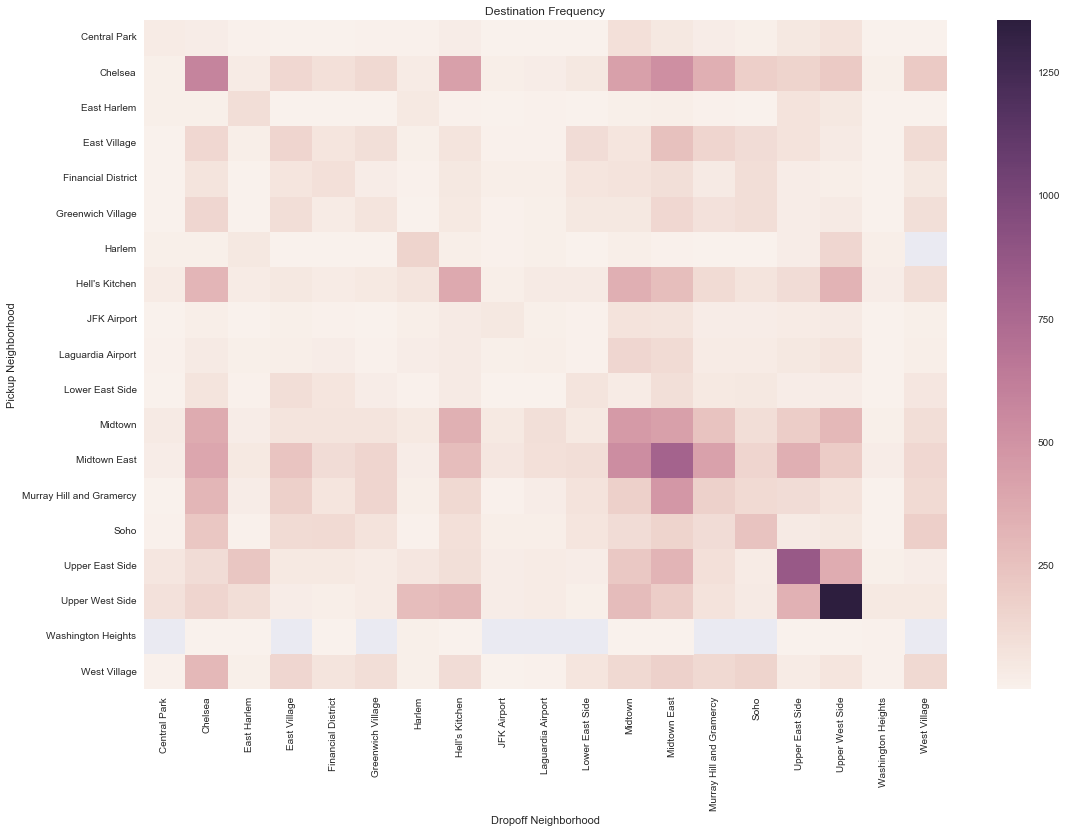

In [96]:
# Show heatmap
fig = plt.figure(figsize=(18, 12))
ax = sns.heatmap(grouped)
plt.xticks(rotation=90) 
plt.yticks(rotation=0) 
plt.title('Destination Frequency')
plt.xlabel('Dropoff Neighborhood')
plt.ylabel('Pickup Neighborhood')
sns.plt.show()


In [97]:

#Transition Model
import csv
from math import radians, cos, sin, asin, sqrt
import datetime as dt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees) in km
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def isWeekDay(string):
    """
    Determine if taxi ride took place on a weekday sometime b/w 1 
    and 2 pm
    """
    string = string.split(" ")
    dayStr = string[0]
    timeStr = string[1]
    date = dt.datetime.strptime(dayStr, "%Y-%m-%d")
    weekday = False # only set to true if day is M-Th
    if date.weekday() < 4: #M-Th
        weekday = True
    hour = int(timeStr.split(":")[0])
    halfhour = int(timeStr.split(":")[1])
    half = 0
    if halfhour > 30:
        half = 1
    return weekday, 2*hour + half

def getCoords(string):
    """
    Convert "(x,y)" to a float tuple
    """
    string = string.split(",")
    x = float(string[0].split("(")[1])
    y = float(string[1].split(")")[0])
    return x,y

def createTransitionModel(File = 'taxi_master_clean.csv', hour = 13):
    transitionModel = dict()
    with open(File, 'rb') as csvfile:
        taxireader = csv.reader(csvfile)
        taxireader.next()
        totalRides = 0.
        # obtain initial counts for actions in each state
        for line in taxireader:
            pTime = line[1] # pickup time
            weekDay, time = isWeekDay(pTime)
            if weekDay:
                totalRides += 1 
                py, px = getCoords(line[3]) # pickup latitude, longitude
                dy, dx = getCoords(line[4]) # dropoff latitude, longitude
                dist = haversine(px, py, dx, dy) # dist is proxy for avg reward
                pNeighborhood = line[5] # pickup neighborhood
                dNeighborhood = line[6] # dropoff neighborhood
                pNei = (pNeighborhood, time)
                dNei = (dNeighborhood, (time + 1)%48)
                if pNei in transitionModel:
                    if dNei in transitionModel[pNei]:
                        oCount, oDist = transitionModel[pNei][dNei]
                        nCount = oCount + 1
                        nDist = (oCount * oDist + dist)/ nCount
                        transitionModel[pNei][dNei] = (nCount, nDist)
                    else:
                        transitionModel[pNei][dNei] = (1.,dist)
                else:
                    transitionModel[pNei] = dict()
                    transitionModel[pNei][dNei] = (1.,dist)

        # normalize counts for each action for each state and obtain prob of pickup
        pickupProb = dict()
        maxProb = 0.
        for key in transitionModel:
            total = sum(item[0] for item in transitionModel[key].values())
            prob = total/totalRides
            pickupProb[key] = prob
            maxProb = max(prob, maxProb)
            for innerKey in transitionModel[key]:
                count, dist = transitionModel[key][innerKey]
                transitionModel[key][innerKey] = (count/total, dist)

        # normalize prob of pickup so maxProb location has 100% chance of pickup
        weight = 1./maxProb
        for key in pickupProb:
            pickupProb[key] *= weight

        return transitionModel,pickupProb


In [98]:
# Driving MDP
import numpy as np
from transitionModelv2 import createTransitionModel



class DrivingMDP:

    def __init__(self):
      self.locations = ['Upper East Side', 'Upper West Side', 'East Harlem', 'Harlem', 'Washington Heights', 'Chelsea', "Hell's Kitchen", 'Midtown', 'Midtown East', 'Murray Hill and Gramercy', 'East Village', 'West Village', 'Greenwich Village', 'Financial District', 'Lower East Side', 'Soho', 'Central Park', 'Laguardia Airport', 'JFK Airport']
      self.actions = ['North','East','South','West','Commit']
      self.numLocations = len(self.locations)
      self.states = []
      for i in range(48):
          for loc in self.locations:
              self.states.append((loc,i))
      self.numStates = len(self.states)

      self.transitionModel, self.pickupProb = createTransitionModel()
      #print pickupProb
      self.failureReward = -0.1 # reward for not finding a customer at cur location
      """
      create a matrix with rows representing neighborhoods, and columns for north east south west,
      with entries encoding which neighborhood you end up in if you are in neighborhood i and drive in direction j
      """
      self.trans = np.array([
              ['East Harlem',0,'Midtown East','Central Park'],            #Upper East
              ['Harlem','Central Park',"Hell's Kitchen",0],               #Upper West
              ['Washington Heights',0, 'Upper East Side', 'Harlem'],          #etc.
              ['Washington Heights','East Harlem','Upper West Side',0],
              [0,'East Harlem',0,'East Harlem'],
              ["Hell's Kitchen",'Murray Hill and Gramercy', 'West Village',0],
              ['Upper West Side','Midtown','Chelsea',0],
              ['Central Park','Midtown East','Murray Hill and Gramercy',"Hell's Kitchen"],
              ['Upper East Side',0,'Murray Hill and Gramercy', 'Midtown'],
              ['Midtown East',0, 'East Village','Chelsea'],
              ['Murray Hill and Gramercy',0,'Lower East Side','Greenwich Village'],
              ['Chelsea','Greenwich Village','Soho',0],
              ['Chelsea','East Village','Soho','West Village'],
              [0,'Lower East Side',0,'Soho'],
              ['East Village',0,'Financial District','Soho'],
              ['West Village','Lower East Side','Financial District',0],
              ['Harlem', 'Upper East Side','Midtown','Upper West Side'],
              [0,0,0,'Upper East Side'],              #Laguardia
              [0,0,0,'Upper East Side']                #JFK
          ])
    def validateState(self, state):
          return state in self.states
    def getActions(self, state):
      possible_actions = []
      state_idx = self.states.index(state) % self.numLocations
      for action_idx,action in enumerate(self.actions):
        if action == "Commit" or self.trans[state_idx][action_idx] != '0':
          possible_actions.append(action)
      return possible_actions
    """uses the trans matrix to look up successor state for deterministic 'drive away' """
    def successorState(self, state, action):
            row = self.states.index(state) % self.numLocations
            col = self.actions.index(action)
            return (self.trans[row][col], ((state[1] + 1) % 48))

    def T(self, state, action):
        """Transition model.  From a state and an action, return a list
        of (result-state, probability) pairs."""
        if action == 'Commit':
            if state in self.transitionModel:
                keys = self.transitionModel[state].keys() #all the next states
                keys.append(None) # account for failure
                probs = [item[0] * self.pickupProb[state] for item in self.transitionModel[state].values()] #the prob values of the next states
                probs.append(1. - self.pickupProb[state]) #probability you don't pick up anyone
                return zip(keys,probs) #return the tuple
            else:
                return []
        #else choose to drive elsewhere
        else:
            newState = self.successorState(state,action)
            return [(newState,1)]


    """
    defining R(s,a,s')
    """
    def R(self, state, action, state1):
        "Return a numeric reward for this state."
        if action == 'Commit':
            if state in self.transitionModel and state1 in self.transitionModel[state]:
                return self.transitionModel[state][state1][1]
            else:
                return self.failureReward
        else:
            """newState = self.successorState(state,action)
            if state not in self.transitionModel or newState not in self.transitionModel[state]:
              return 0
            else:
              return self.transitionModel[state][newState][1]"""
            return self.failureReward

    #think value iteration is good to go
    def value_iteration(self,epsilon=0.001, gamma = 0.9):
        "Solving an MDP by value iteration."
        states = self.states
        U1 = {s: 0. for s in states}

        while True:
            U = U1.copy()
            delta = 0
            total = 0
            for s in states:
              max_of_actions = -float("inf")
              for a in self.getActions(s):
                  sum_of_reward_over_states = 0
                  for (s1, p) in self.T(s, a):
                      if s1 != None:
                          sum_of_reward_over_states += p * (self.R(s,a,s1) + gamma * U[s1])
                      else:
                          newstate = s[0],(s[1]+1)%48
                          sum_of_reward_over_states += p * (self.R(s,a,s1) + gamma * U[newstate])

                  if sum_of_reward_over_states > max_of_actions:
                      max_of_actions = sum_of_reward_over_states
              U1[s] = max_of_actions
              delta = abs(U1[s] - U[s])
              if delta < epsilon :
                 total += 1
            if total == self.numStates:
                return U1



In [99]:
def t_str(time):
    add = 0
    if time % 2 == 1:
        add = 30
    return "%02d:%02d" % (time/2, add)
#Populate with correct values
correct_columns = ['Neighborhood', 'Time (h)', 'Value']

neighborhoods = []
times = []
values = []
mdp = DrivingMDP()
vals = mdp.value_iteration()
for loc,time in vals:
    neighborhoods.append(loc)
    times.append(t_str(time))
    values.append(vals[(loc,time)])

result = pd.DataFrame()
result['Neighborhood'] =neighborhoods
result['Time (h)'] = times
result['Value'] = values

result.head()

,Neighborhood,Time (h),Value
0,Hell's Kitchen,14:30,10.904671
1,Lower East Side,13:30,8.598320
2,Upper West Side,05:30,12.215909
3,Greenwich Village,08:00,10.152110
4,Laguardia Airport,11:00,13.092050


In [100]:
result.tail()

,Neighborhood,Time (h),Value
907,East Harlem,19:00,7.902878
908,Soho,21:00,7.776652
909,Harlem,20:30,7.536233
910,Upper East Side,04:00,8.949445
911,Murray Hill and Gramercy,22:00,6.711103


In [101]:
result_pivoted = result.pivot('Neighborhood', 'Time (h)', 'Value')

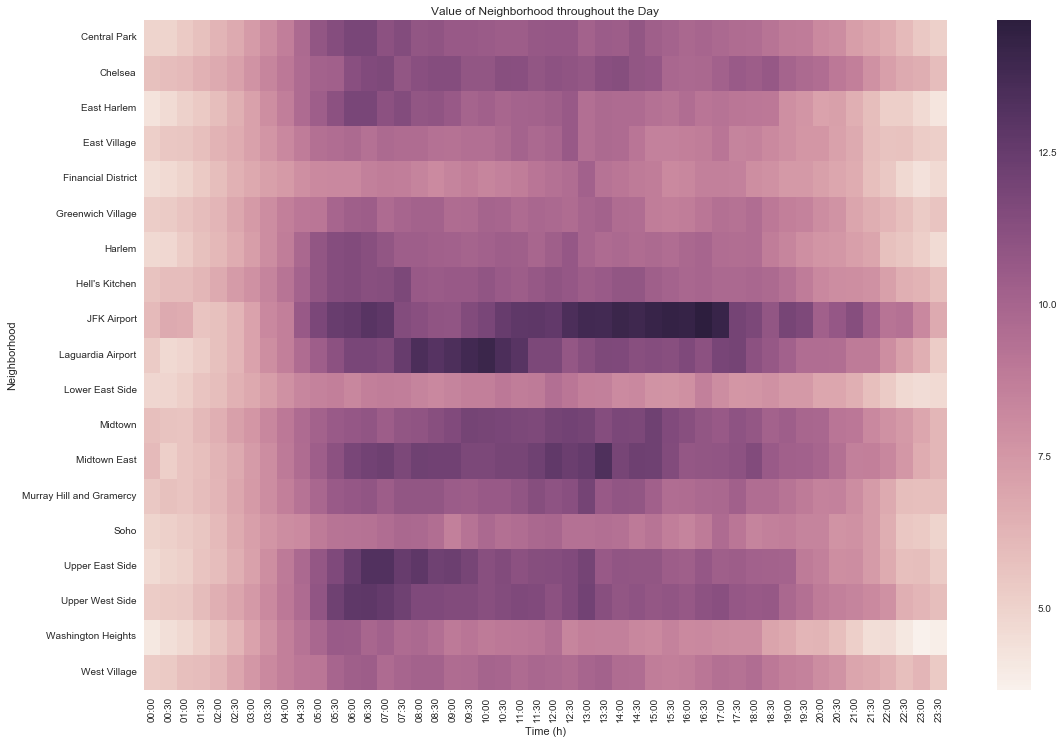

In [102]:
plt.close('all')
fig = plt.figure(figsize=(18, 12))
ax = sns.heatmap(result_pivoted)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.title('Value of Neighborhood throughout the Day')
sns.plt.show()

In [103]:
Bactions = result
Bactions.head()

,Neighborhood,Time (h),Value
0,Hell's Kitchen,14:30,10.904671
1,Lower East Side,13:30,8.598320
2,Upper West Side,05:30,12.215909
3,Greenwich Village,08:00,10.152110
4,Laguardia Airport,11:00,13.092050


In [104]:

        

newMDP = DrivingMDP()
new_matrix = []
NeighA  = dict()
for loc,time in vals:
    if t_str(time) not in NeighA:
        NeighA[t_str(time)] = {}
    max_successor_value = float("-inf")
    max_successor_action = None
    max_successor_future_state = None
    state = (loc, time)
    for action in newMDP.getActions(state):
        successors = newMDP.T(state, action)
        successor_value = 0
        for successor_state, prob in successors:
            if successor_state:
                amount = vals[successor_state]
                successor_value += amount * prob
            else:
                amount = vals[state]
                successor_value += amount * prob
        if successor_value > max_successor_value:
            max_successor_value  =  successor_value
            max_successor_action = action
            #max_successor_future_state = successor_state
    NeighA[t_str(time)][loc] = max_successor_action        


In [105]:
recommendations = pd.DataFrame(NeighA)
recommendations.T


,Central Park,Chelsea,East Harlem,East Village,Financial District,Greenwich Village,Harlem,Hell's Kitchen,JFK Airport,Laguardia Airport,Lower East Side,Midtown,Midtown East,Murray Hill and Gramercy,Soho,Upper East Side,Upper West Side,Washington Heights,West Village
00:00,South,North,South,North,West,North,South,South,Commit,Commit,North,West,Commit,West,North,South,South,East,North
00:30,South,North,West,North,West,North,South,South,Commit,West,North,West,South,West,North,South,South,East,North
01:00,South,North,West,North,East,North,South,South,Commit,West,North,West,West,West,North,South,South,East,North
01:30,South,North,West,North,West,North,South,South,West,West,North,West,West,West,North,South,South,East,North
02:00,South,North,West,North,West,North,South,East,West,West,West,West,West,West,North,South,South,East,North
02:30,South,North,West,North,West,North,South,South,West,West,West,West,West,West,North,South,South,East,North
03:00,South,North,West,North,West,North,South,South,West,West,North,West,West,West,North,South,South,East,North
03:30,South,North,South,North,West,North,South,North,West,West,North,West,West,West,North,South,South,East,North
04:00,North,North,West,North,East,North,East,North,West,West,North,West,North,West,North,West,South,East,North
04:30,West,North,West,North,West,North,South,North,West,West,North,North,North,North,North,West,North,East,North
